In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [2]:
prostate = pd.read_table("prostate.data")
prostate.drop(prostate.columns[0], axis=1, inplace=True)
prostate.train.replace(to_replace=['F', 'T'], value=[0, 1], inplace=True)

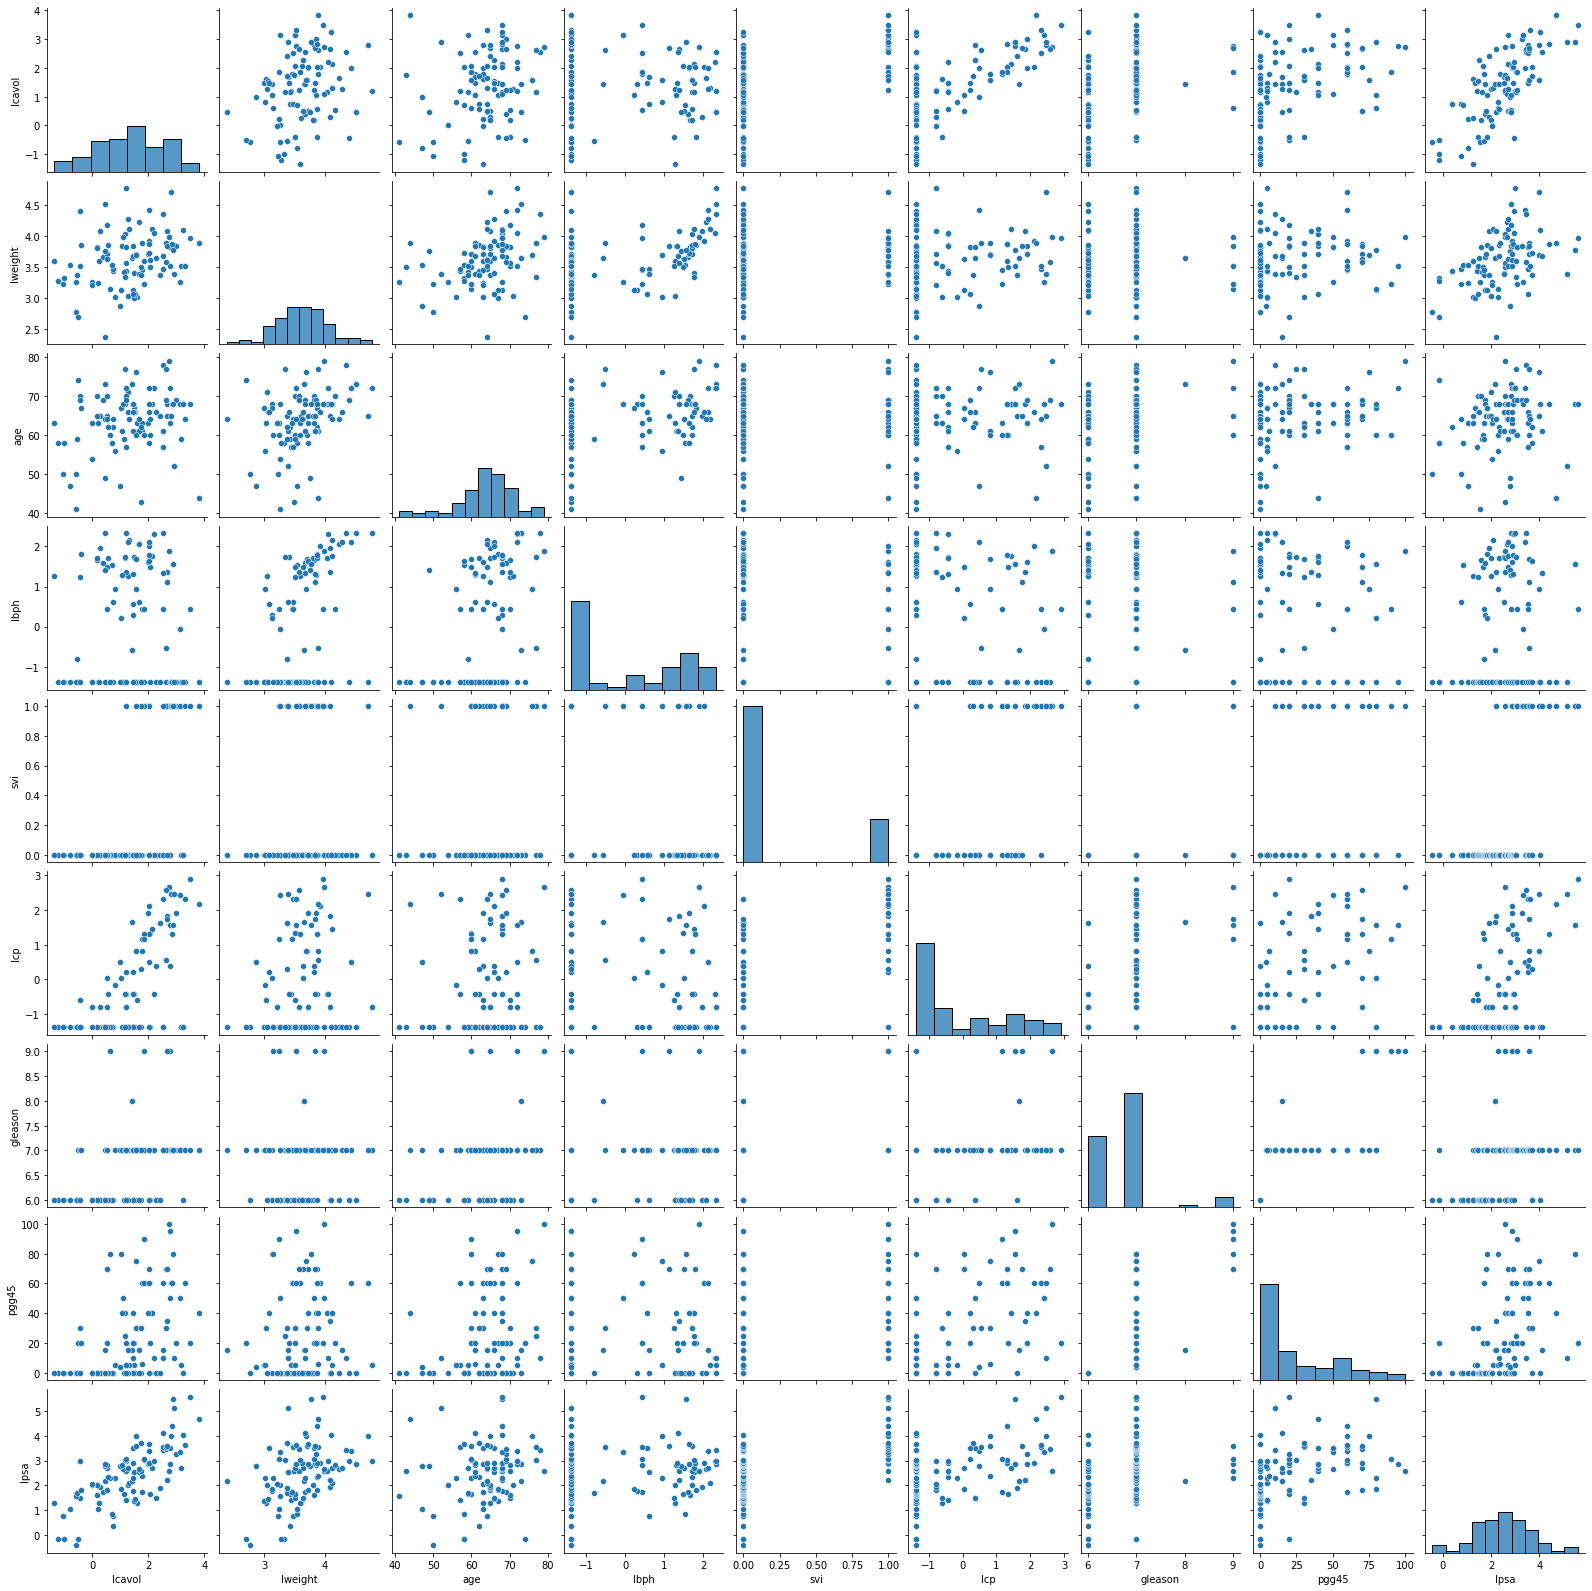

In [3]:
sns.pairplot(prostate.loc[:, prostate.columns != "train"])

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
reg = linear_model.LinearRegression()
reg.fit(prostate.drop(["lpsa", "train"], axis=1), prostate["lpsa"])

LinearRegression()

In [6]:
reg.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 8,
 'coef_': array([ 0.56434128,  0.62201979, -0.02124819,  0.09671252,  0.7616734 ,
        -0.10605094,  0.04922793,  0.00445751]),
 '_residues': 43.058418737724914,
 'rank_': 8,
 'singular_': array([277.3661905 ,  70.11609399,  13.7552466 ,  12.99309749,
          6.77465632,   4.63893262,   3.41377289,   2.83294011]),
 'intercept_': 0.18156084546896523}

In [7]:
y_pred = reg.predict(prostate.drop(["lpsa", "train"], axis=1))

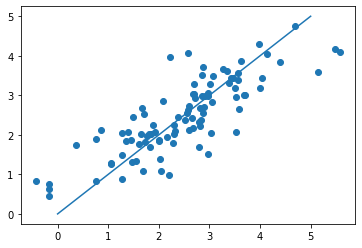

In [8]:
plt.scatter(prostate["lpsa"], y_pred)
plt.plot([0, 5], [0, 5])

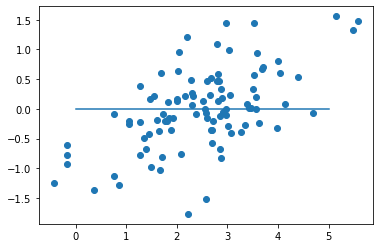

In [9]:
residuals = prostate["lpsa"] - y_pred
plt.scatter(prostate["lpsa"], residuals)
plt.plot([0, 5], [0, 0])

In [10]:
reg = linear_model.LinearRegression()
reg.fit(prostate.drop(["lpsa", "train", 'lcavol'], axis=1), prostate["lpsa"])
print(reg.__dict__)

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'n_features_in_': 7, 'coef_': array([ 8.92325759e-01, -1.28823917e-02,  6.48625120e-02,  9.92165285e-01,
        1.48621521e-01,  2.35857619e-01,  6.47731555e-04]), '_residues': 63.257849212978826, 'rank_': 7, 'singular_': array([277.32033358,  70.10644963,  13.40466042,  10.7853374 ,
         4.67752965,   3.5439489 ,   2.84687686]), 'intercept_': -1.740155409919077}


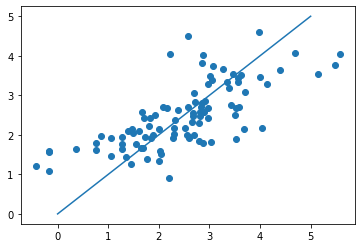

In [11]:
y_pred = reg.predict(prostate.drop(["lpsa", "train", 'lcavol'], axis=1))
plt.scatter(prostate["lpsa"], y_pred)
plt.plot([0, 5], [0, 5])

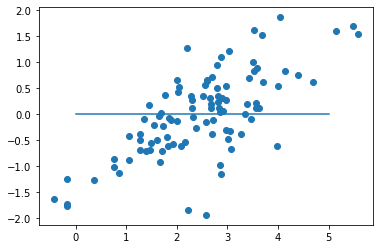

In [12]:
residuals = prostate["lpsa"] - y_pred
plt.scatter(prostate["lpsa"], residuals)
plt.plot([0, 5], [0, 0])

In [13]:
reg = linear_model.LinearRegression()
reg.fit(prostate.drop(["lpsa", "train", 'lcavol', 'lweight'], axis=1), prostate["lpsa"])
print(reg.__dict__)

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None, 'n_features_in_': 6, 'coef_': array([-1.47985117e-03,  1.67234177e-01,  1.10672387e+00,  1.87642728e-01,
        1.77970802e-01, -1.82807699e-05]), '_residues': 73.35391934023403, 'rank_': 6, 'singular_': array([277.3199201 ,  70.09244002,  13.33317997,  10.74711241,
         4.64246641,   2.88086313]), 'intercept_': 1.1488568800472574}


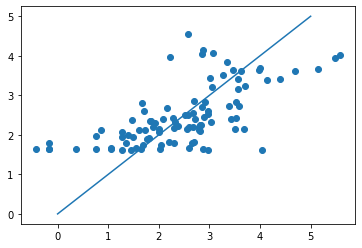

In [14]:
y_pred = reg.predict(prostate.drop(["lpsa", "train", 'lcavol', 'lweight'], axis=1))
plt.scatter(prostate["lpsa"], y_pred)
plt.plot([0, 5], [0, 5])

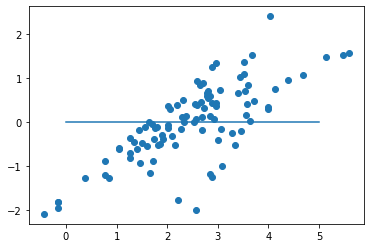

In [15]:
residuals = prostate["lpsa"] - y_pred
plt.scatter(prostate["lpsa"], residuals)
plt.plot([0, 5], [0, 0])

In [16]:
# Q4
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]

X_train = prostate_train.drop(["lpsa", 'train'], axis=1)
y_train = prostate_train["lpsa"]
X_test = prostate_test.drop(["lpsa", 'train'], axis=1)
y_test = prostate_test["lpsa"]

In [17]:
X_train

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
90,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0
91,2.532903,3.677566,61,1.348073,1,-1.386294,7,15
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40


In [18]:
y_train

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
90    4.029806
91    4.129551
92    4.385147
93    4.684443
95    5.477509
Name: lpsa, Length: 67, dtype: float64

In [19]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(X_test)

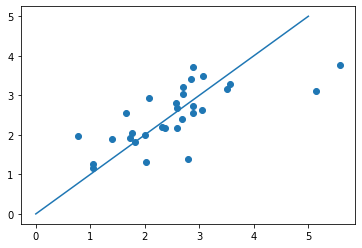

In [21]:
plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5])

In [22]:
mse = mean_squared_error(y_test, y_pred)
mse

0.5212740055076022

In [23]:
# Part II: Calcium data

In [24]:
calcium = pd.read_csv("calcium.RData", header=None, 
                      delim_whitespace=True, skiprows=1, usecols=range(1, 3))

In [25]:
calcium

,1,2
0,0.45,0.34170
1,0.45,-0.00438
2,0.45,0.82531
3,1.30,1.77967
4,1.30,0.95384
5,1.30,0.64080
6,2.40,1.75136
7,2.40,1.27497
8,2.40,1.17332
9,4.00,3.12273


In [26]:
calcium.rename(columns={1: 'time', 2: 'cal'}, inplace=True)
calcium

,time,cal
0,0.45,0.34170
1,0.45,-0.00438
2,0.45,0.82531
3,1.30,1.77967
4,1.30,0.95384
5,1.30,0.64080
6,2.40,1.75136
7,2.40,1.27497
8,2.40,1.17332
9,4.00,3.12273


In [27]:
reg = linear_model.LinearRegression()
reg.fit(calcium.drop(['cal'], axis=1), calcium['cal'])

LinearRegression()

In [28]:
reg.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([0.2426872]),
 '_residues': 13.24979091535727,
 'rank_': 1,
 'singular_': array([26.05526178]),
 'intercept_': 1.026495419050097}

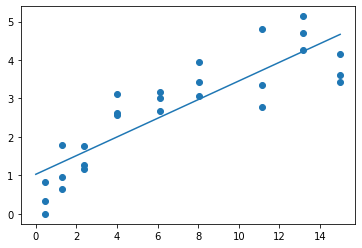

In [29]:
plt.scatter(calcium['time'], calcium['cal'])
plt.plot([0, 15], [reg.intercept_, reg.intercept_ + 15 * reg.coef_[0]])

In [30]:
'''
plot(calcium$time,fit$residuals)
abline(h=0)
plot(calcium$cal,fit$residuals)
abline(h=0)
'''

'\nplot(calcium$time,fit$residuals)\nabline(h=0)\nplot(calcium$cal,fit$residuals)\nabline(h=0)\n'

In [31]:
# Q4

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(2)

In [34]:
X = calcium.drop(['cal'], axis=1)
X

,time
0,0.45
1,0.45
2,0.45
3,1.30
4,1.30
5,1.30
6,2.40
7,2.40
8,2.40
9,4.00


In [35]:
y = calcium['cal']

In [36]:
poly.fit_transform(X).__class__

numpy.ndarray

In [37]:
poly.fit_transform(X)

array([[1.000000e+00, 4.500000e-01, 2.025000e-01],
       [1.000000e+00, 4.500000e-01, 2.025000e-01],
       [1.000000e+00, 4.500000e-01, 2.025000e-01],
       [1.000000e+00, 1.300000e+00, 1.690000e+00],
       [1.000000e+00, 1.300000e+00, 1.690000e+00],
       [1.000000e+00, 1.300000e+00, 1.690000e+00],
       [1.000000e+00, 2.400000e+00, 5.760000e+00],
       [1.000000e+00, 2.400000e+00, 5.760000e+00],
       [1.000000e+00, 2.400000e+00, 5.760000e+00],
       [1.000000e+00, 4.000000e+00, 1.600000e+01],
       [1.000000e+00, 4.000000e+00, 1.600000e+01],
       [1.000000e+00, 4.000000e+00, 1.600000e+01],
       [1.000000e+00, 6.100000e+00, 3.721000e+01],
       [1.000000e+00, 6.100000e+00, 3.721000e+01],
       [1.000000e+00, 6.100000e+00, 3.721000e+01],
       [1.000000e+00, 8.050000e+00, 6.480250e+01],
       [1.000000e+00, 8.050000e+00, 6.480250e+01],
       [1.000000e+00, 8.050000e+00, 6.480250e+01],
       [1.000000e+00, 1.115000e+01, 1.243225e+02],
       [1.000000e+00, 1.115000e

In [38]:
poly.fit_transform(X)[:, 1:]

array([[4.500000e-01, 2.025000e-01],
       [4.500000e-01, 2.025000e-01],
       [4.500000e-01, 2.025000e-01],
       [1.300000e+00, 1.690000e+00],
       [1.300000e+00, 1.690000e+00],
       [1.300000e+00, 1.690000e+00],
       [2.400000e+00, 5.760000e+00],
       [2.400000e+00, 5.760000e+00],
       [2.400000e+00, 5.760000e+00],
       [4.000000e+00, 1.600000e+01],
       [4.000000e+00, 1.600000e+01],
       [4.000000e+00, 1.600000e+01],
       [6.100000e+00, 3.721000e+01],
       [6.100000e+00, 3.721000e+01],
       [6.100000e+00, 3.721000e+01],
       [8.050000e+00, 6.480250e+01],
       [8.050000e+00, 6.480250e+01],
       [8.050000e+00, 6.480250e+01],
       [1.115000e+01, 1.243225e+02],
       [1.115000e+01, 1.243225e+02],
       [1.115000e+01, 1.243225e+02],
       [1.315000e+01, 1.729225e+02],
       [1.315000e+01, 1.729225e+02],
       [1.315000e+01, 1.729225e+02],
       [1.500000e+01, 2.250000e+02],
       [1.500000e+01, 2.250000e+02],
       [1.500000e+01, 2.250000e+02]])

In [39]:
X_poly = pd.DataFrame(poly.fit_transform(X)[:, 1:])

In [40]:
X_poly

,0,1
0,0.45,0.2025
1,0.45,0.2025
2,0.45,0.2025
3,1.30,1.6900
4,1.30,1.6900
5,1.30,1.6900
6,2.40,5.7600
7,2.40,5.7600
8,2.40,5.7600
9,4.00,16.0000


In [41]:
reg1 = linear_model.LinearRegression()
reg1.fit(X_poly, y)

LinearRegression()

In [42]:
reg1.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 2,
 'coef_': array([ 0.61195394, -0.02436716]),
 '_residues': 7.4646719348785835,
 'rank_': 2,
 'singular_': array([407.78409773,   6.30690729]),
 'intercept_': 0.2532612876332263}

In [43]:
seq = np.linspace(0, 15, 151)
seq

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [44]:
seq_poly = pd.DataFrame(poly.fit_transform(pd.DataFrame(seq))[:, 1:])

In [45]:
yhat = reg1.predict(seq_poly)

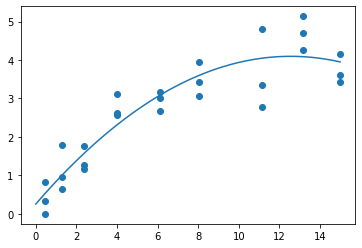

In [46]:
plt.scatter(calcium['time'], calcium['cal'])
plt.plot(seq, yhat)

In [47]:
poly = PolynomialFeatures(3)

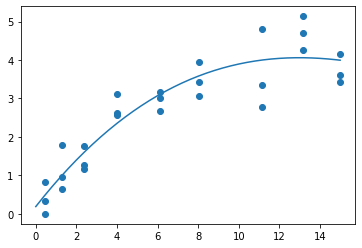

In [48]:
X_poly = pd.DataFrame(poly.fit_transform(X)[:, 1:])
reg2 = linear_model.LinearRegression()
reg2.fit(X_poly, y)
seq = np.linspace(0, 15, 151)
seq_poly = pd.DataFrame(poly.fit_transform(pd.DataFrame(seq))[:, 1:])
yhat = reg2.predict(seq_poly)
plt.scatter(calcium['time'], calcium['cal'])
plt.plot(seq, yhat)

In [49]:
reg2.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 3,
 'coef_': array([ 6.72925845e-01, -3.47620171e-02,  4.54864171e-04]),
 '_residues': 7.435485293074605,
 'rank_': 3,
 'singular_': array([5.99844495e+03, 6.35994781e+01, 2.53200662e+00]),
 'intercept_': 0.18682435372296036}

In [50]:
from sklearn.preprocessing import FunctionTransformer

In [51]:
transformer = FunctionTransformer(np.sqrt)

In [52]:
transformer.transform(X)

,time
0,0.670820
1,0.670820
2,0.670820
3,1.140175
4,1.140175
5,1.140175
6,1.549193
7,1.549193
8,1.549193
9,2.000000


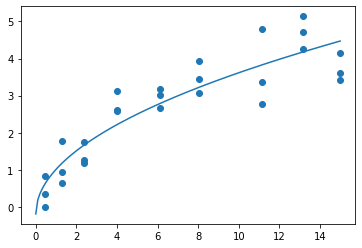

In [53]:
X_transformed = transformer.transform(X)
reg3 = linear_model.LinearRegression()
reg3.fit(X_transformed, y)
seq = np.linspace(0, 15, 151)
seq_transformed = pd.DataFrame(transformer.transform(seq))
yhat = reg3.predict(seq_transformed)
plt.scatter(calcium['time'], calcium['cal'])
plt.plot(seq, yhat)

In [54]:
reg3.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([1.2019547]),
 '_residues': 8.975406860975255,
 'rank_': 1,
 'singular_': array([5.53488931]),
 'intercept_': -0.1845426125286349}

In [55]:
def create_df_identity_sqrt_square(arr_np):
    return pd.DataFrame(np.vstack((arr_np, np.square(arr_np), np.sqrt(arr_np))).T)

In [56]:
time_identity_sqrt_square = create_df_identity_sqrt_square(X['time'].to_numpy())
time_identity_sqrt_square

,0,1,2
0,0.45,0.2025,0.670820
1,0.45,0.2025,0.670820
2,0.45,0.2025,0.670820
3,1.30,1.6900,1.140175
4,1.30,1.6900,1.140175
5,1.30,1.6900,1.140175
6,2.40,5.7600,1.549193
7,2.40,5.7600,1.549193
8,2.40,5.7600,1.549193
9,4.00,16.0000,2.000000


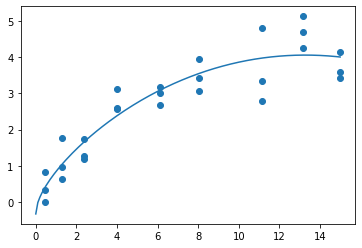

In [57]:
X_transformed = time_identity_sqrt_square
reg4 = linear_model.LinearRegression()
reg4.fit(X_transformed, y)
seq = np.linspace(0, 15, 151)
seq_transformed = create_df_identity_sqrt_square(seq)
yhat = reg4.predict(seq_transformed)
plt.scatter(calcium['time'], calcium['cal'])
plt.plot(seq, yhat)

In [58]:
reg4.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 3,
 'coef_': array([ 0.29230394, -0.01565157,  0.89879284]),
 '_residues': 7.341918754343451,
 'rank_': 3,
 'singular_': array([4.07815308e+02, 6.69493570e+00, 3.67192307e-01]),
 'intercept_': -0.3340324856299359}

In [59]:
'''
print(c(summary(fit)$r.squared,summary(fit1)$r.squared,summary(fit2)$r.squared,
        summary(fit3)$r.squared,summary(fit4)$r.squared))

'''

'\nprint(c(summary(fit)$r.squared,summary(fit1)$r.squared,summary(fit2)$r.squared,\n        summary(fit3)$r.squared,summary(fit4)$r.squared))\n\n'

In [60]:
# Part III

In [61]:
n = 500

In [62]:
x1 = np.random.uniform(low=0.0, high=1.0, size=n)
x2 = np.random.uniform(low=0.0, high=1.0, size=n)

In [63]:
X = np.vstack((np.ones(n), x1, x2)).T
X

array([[1.        , 0.28590856, 0.41604879],
       [1.        , 0.23212636, 0.65497052],
       [1.        , 0.90380032, 0.73771082],
       ...,
       [1.        , 0.823353  , 0.82804821],
       [1.        , 0.83550119, 0.62329809],
       [1.        , 0.12686926, 0.96225341]])

In [64]:
beta = np.array([0, 0.1, 1])
beta

array([0. , 0.1, 1. ])

In [65]:
Ey = np.dot(X, beta)
Ey

array([0.44463965, 0.67818316, 0.82809086, 0.9556784 , 0.57626516,
       0.60150692, 0.34779954, 0.13841943, 0.20421167, 0.22132642,
       0.57662591, 0.70229876, 0.36433882, 0.59916871, 0.28268809,
       0.58429836, 0.41533984, 0.95551134, 0.17617432, 0.9900762 ,
       0.8314782 , 0.16092669, 0.52607348, 0.47010826, 0.66819082,
       0.88877578, 0.13362787, 0.99944248, 1.02579855, 0.85801711,
       0.21999768, 0.45784093, 0.95002164, 0.64501162, 0.3451329 ,
       0.89103151, 0.53156189, 0.28232566, 0.0838833 , 0.38123124,
       0.79866323, 0.84134268, 0.905126  , 0.70413113, 0.71405968,
       0.04255901, 0.32543344, 0.25753997, 0.01942032, 0.09338206,
       0.61117521, 0.61640497, 0.32048147, 0.04609984, 0.13140286,
       0.09635151, 0.49993833, 0.52431457, 0.91578224, 0.55263205,
       0.23875133, 0.69899398, 0.66636778, 1.04749558, 0.41534583,
       0.95409777, 0.30583512, 0.20266968, 0.96728083, 0.92621078,
       1.06647903, 1.04234159, 0.31019673, 0.176731  , 0.09936

In [66]:
sig = 0.5

In [67]:
N = 1000

In [68]:
pval = np.zeros((N, 3))
pval

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [69]:
import statsmodels.api as sm
X = pd.DataFrame(np.vstack((np.ones(n), x1, x2)).T)
y = Ey + np.random.normal(0, sig, n)
mod = sm.OLS(y,X)
fit = mod.fit()
print(fit.summary())
print("\n-----***********--------\n")
print(fit.summary2())
print("\n-----***********--------\n")
print(fit.summary2().tables[1])
print("\n-----***********--------\n")
print(fit.summary2().tables[1]['P>|t|'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     116.4
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.51e-42
Time:                        19:54:32   Log-Likelihood:                -329.01
No. Observations:                 500   AIC:                             664.0
Df Residuals:                     497   BIC:                             676.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0156      0.055      0.283      0.7

In [70]:
import statsmodels.api as sm
for i in range(N):
    y = Ey + np.random.normal(0, sig, n)
    X = pd.DataFrame(np.vstack((np.ones(n), x1, x2)).T)
    mod = sm.OLS(y,X)
    fit = mod.fit()
    pval[i] = fit.summary2().tables[1]['P>|t|']
(pval <= 0.05).mean(axis=0)  

array([0.047, 0.246, 1.   ])